<h1 style="color:red" align="center">Outliers Detection</h1>

**732_Saksham**

**Aim : Find the Outliers from given dataset by using Trimming and Capping Method.**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Dataset/placement.csv")

df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [3]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

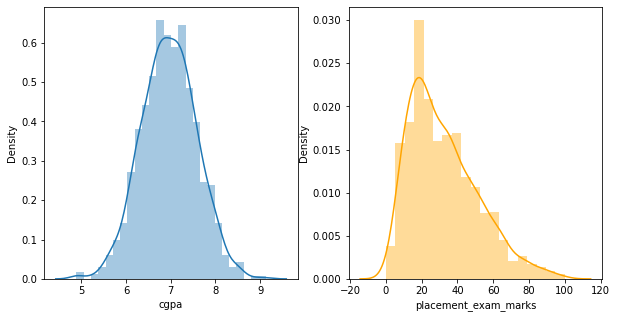

In [5]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'], color="orange")

**CGPA is Normally distributed. Entrance exam is RightSkewed.**

In [6]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<AxesSubplot:xlabel='placement_exam_marks'>

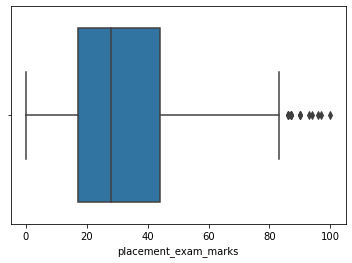

In [7]:
sns.boxplot(df['placement_exam_marks'])

In [8]:
# finding boundries value and print

print("Highest Boundary value of CGPA : ", df['cgpa'].mean() + 3 * df['cgpa'].std())
print("Lowest Boundary value of CGPA : ", df['cgpa'].mean() - 3 * df['cgpa'].std())

# mean + 3 X STD

Highest Boundary value of CGPA :  8.808933625397177
Lowest Boundary value of CGPA :  5.113546374602842


In [9]:
# find outliers (Greater than Higest value and lower than lowest boundary.)

df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

# | = and

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


<h1 style="color:green">Trimming</h1>


In [10]:
df.shape

(1000, 3)

In [11]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df.head(3)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1


In [12]:
new_df.shape

(995, 3)

<h1 style="color:green">Z-Score</h1>

Zi = Xi - Mean / std

In [13]:
df['cgpa_z_score'] = (df['cgpa'] - df['cgpa'].mean() ) / df['cgpa'].std()

In [14]:
df.sample(4)

,cgpa,placement_exam_marks,placed,cgpa_z_score
26,7.45,8.0,1,0.793573
802,6.10,16.0,0,-1.398349
468,6.73,70.0,0,-0.375452
507,6.77,75.0,1,-0.310506


In [15]:
df['cgpa_z_score'].describe()

count    1.000000e+03
mean    -1.600275e-14
std      1.000000e+00
min     -3.362960e+00
25%     -6.677081e-01
50%     -2.013321e-03
75%      6.636815e-01
max      3.505062e+00
Name: cgpa_z_score, dtype: float64

In [16]:
# NOw check for outliers

df[df['cgpa_z_score']>3]

,cgpa,placement_exam_marks,placed,cgpa_z_score
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [17]:
df[df['cgpa_z_score'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_z_score
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [18]:
new_dff = df[(df['cgpa_z_score'] > 3) | (df['cgpa_z_score'] < -3)]

new_dff

,cgpa,placement_exam_marks,placed,cgpa_z_score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [19]:
new_dff = df[(df['cgpa_z_score'] < 3) & (df['cgpa_z_score'] > -3)]

new_dff

,cgpa,placement_exam_marks,placed,cgpa_z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


In [20]:
new_df.shape

(995, 3)

<h1 style="color:green">Capping</h1>

In [21]:
upper_limit = df['cgpa'].mean() + 3 * df['cgpa'].std()

upper_limit

8.808933625397177

In [22]:
lower_limit = df['cgpa'].mean() - 3 * df['cgpa'].std()

lower_limit

5.113546374602842

In [23]:
df['cgpa_cap'] = np.where(
    df['cgpa'] > upper_limit,
    upper_limit,
    np.where(
    df['cgpa'] < lower_limit,
        lower_limit,
        df['cgpa']))

In [24]:
df.sample(5).style.background_gradient()

,cgpa,placement_exam_marks,placed,cgpa_z_score,cgpa_cap
55,8.120000,15.000000,0,1.881416,8.120000
280,6.620000,55.000000,0,-0.554053,6.620000
502,7.180000,50.000000,1,0.355189,7.180000
574,6.540000,33.000000,0,-0.683945,6.540000
777,7.670000,23.000000,0,1.150775,7.670000


In [25]:
df.describe().style.background_gradient()

,cgpa,placement_exam_marks,placed,cgpa_z_score,cgpa_cap
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000,-0.000000,6.961499
std,0.615898,19.130822,0.500129,1.000000,0.612688
min,4.890000,0.000000,0.000000,-3.362960,5.113546
25%,6.550000,17.000000,0.000000,-0.667708,6.550000
50%,6.960000,28.000000,0.000000,-0.002013,6.960000
75%,7.370000,44.000000,1.000000,0.663681,7.370000
max,9.120000,100.000000,1.000000,3.505062,8.808934


In [26]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [27]:
df.describe()

,cgpa,placement_exam_marks,placed,cgpa_z_score,cgpa_cap
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,6.961240,32.225000,0.489000,-1.600275e-14,6.961499
std,0.615898,19.130822,0.500129,1.000000e+00,0.612688
min,4.890000,0.000000,0.000000,-3.362960e+00,5.113546
25%,6.550000,17.000000,0.000000,-6.677081e-01,6.550000
50%,6.960000,28.000000,0.000000,-2.013321e-03,6.960000
75%,7.370000,44.000000,1.000000,6.636815e-01,7.370000
max,9.120000,100.000000,1.000000,3.505062e+00,8.808934


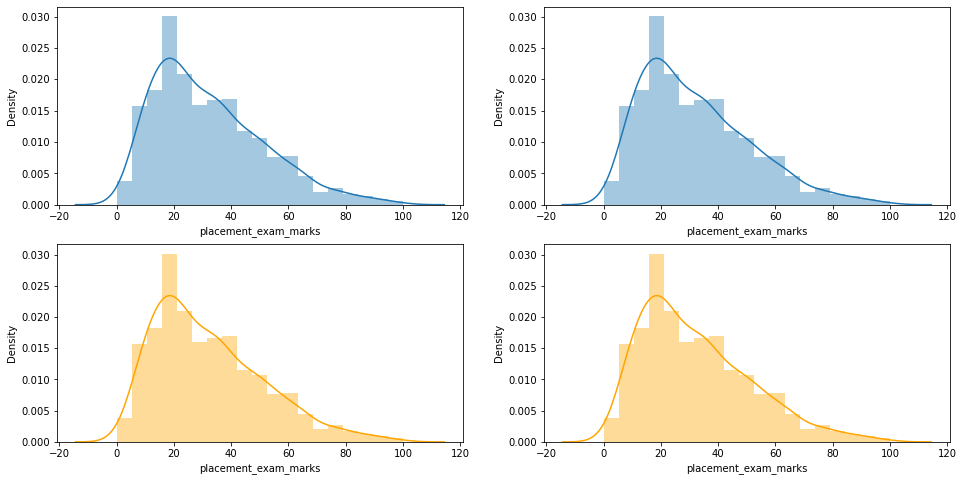

In [28]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'], color = "orange")

plt.subplot(2,2,4)
sns.distplot(new_df['placement_exam_marks'], color = "orange")

plt.show()

<h1 style="color:green">Capping on skewed data.</h1>

In [29]:
# we use it on skewed data.

df['placement_exam_marks'].skew()

0.8356419499466834

In [30]:
# data which is normally distributed.

df['cgpa'].skew()

-0.014529938929314918

<AxesSubplot:xlabel='placement_exam_marks'>

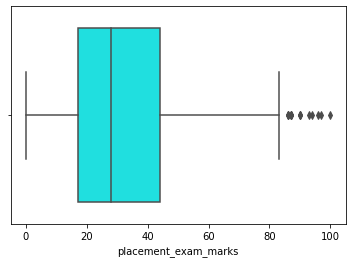

In [31]:
sns.boxplot(df['placement_exam_marks'], color = "cyan")

In [32]:
q1, q2, q3 = df['placement_exam_marks'].describe()[["25%","50%","75%"]]

In [33]:
q1

17.0

In [34]:
q2

28.0

In [35]:
q3

44.0

In [36]:
iqr = q3 - q1

iqr

27.0

In [37]:
upper_limit = q3 + 1.5 * iqr

upper_limit

84.5

In [38]:
lower_limit = q1 - 1.5 * iqr

lower_limit

-23.5

In [39]:
# outliers

df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed,cgpa_z_score,cgpa_cap
9,7.75,94.0,1,1.280667,7.75
40,6.60,86.0,1,-0.586526,6.60
61,7.51,86.0,0,0.890992,7.51
134,6.33,93.0,0,-1.024910,6.33
162,7.80,90.0,0,1.361849,7.80
283,7.09,87.0,0,0.209061,7.09
290,8.38,87.0,0,2.303564,8.38
311,6.97,87.0,1,0.014223,6.97
324,6.64,90.0,0,-0.521580,6.64
630,6.56,96.0,1,-0.651472,6.56


In [40]:
df[df['placement_exam_marks'] > upper_limit].shape

(15, 5)

In [41]:
df[df['placement_exam_marks'] < lower_limit].shape

(0, 5)

<h1 style="color:green">Trimming</h1>

In [42]:
new_dff = df[df['placement_exam_marks'] < upper_limit]

new_dff.head()

,cgpa,placement_exam_marks,placed,cgpa_z_score,cgpa_cap
0,7.19,26.0,1,0.371425,7.19
1,7.46,38.0,1,0.809810,7.46
2,7.54,40.0,1,0.939701,7.54
3,6.42,8.0,1,-0.878782,6.42
4,7.23,17.0,0,0.436371,7.23


In [43]:
new_dff.shape

(985, 5)

In [44]:
df.shape

(1000, 5)

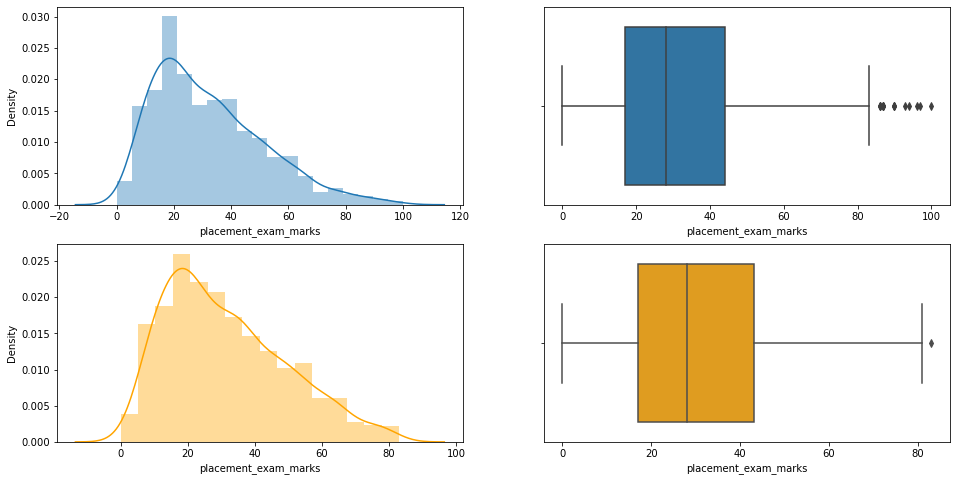

In [45]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_dff['placement_exam_marks'], color = "orange")

plt.subplot(2,2,4)
sns.boxplot(new_dff['placement_exam_marks'], color = "orange")

plt.show()

In [46]:
df_new1 = df[df['placement_exam_marks'] > upper_limit]

df_new1

,cgpa,placement_exam_marks,placed,cgpa_z_score,cgpa_cap
9,7.75,94.0,1,1.280667,7.75
40,6.60,86.0,1,-0.586526,6.60
61,7.51,86.0,0,0.890992,7.51
134,6.33,93.0,0,-1.024910,6.33
162,7.80,90.0,0,1.361849,7.80
283,7.09,87.0,0,0.209061,7.09
290,8.38,87.0,0,2.303564,8.38
311,6.97,87.0,1,0.014223,6.97
324,6.64,90.0,0,-0.521580,6.64
630,6.56,96.0,1,-0.651472,6.56


<h1 style="color:green">Capping</h1>

In [47]:
new_dff_cap = df.copy()

new_dff_cap['placement_exam_marks'] = np.where(
    new_dff_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_dff_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_dff_cap['placement_exam_marks']
    )
)

In [48]:
new_dff_cap.head()

,cgpa,placement_exam_marks,placed,cgpa_z_score,cgpa_cap
0,7.19,26.0,1,0.371425,7.19
1,7.46,38.0,1,0.809810,7.46
2,7.54,40.0,1,0.939701,7.54
3,6.42,8.0,1,-0.878782,6.42
4,7.23,17.0,0,0.436371,7.23


In [49]:
new_dff_cap.shape

(1000, 5)

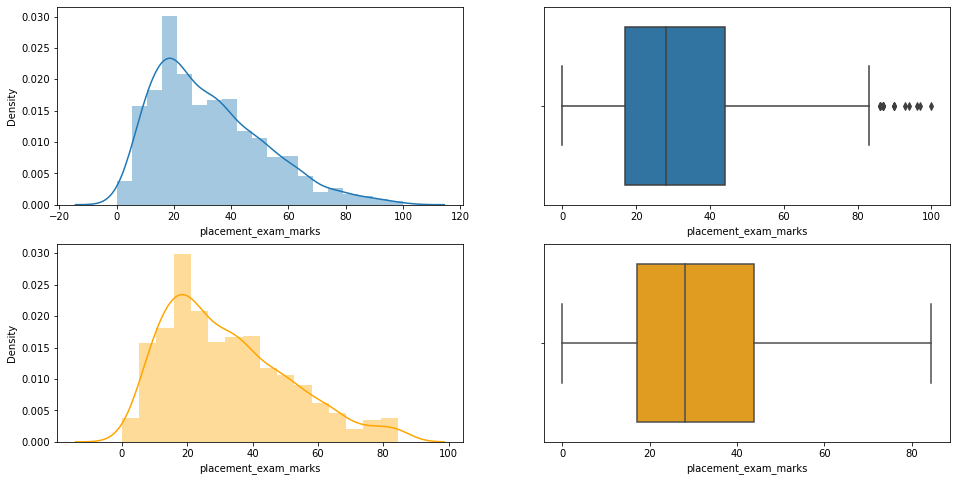

In [50]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_dff_cap['placement_exam_marks'], color = "orange")

plt.subplot(2,2,4)
sns.boxplot(new_dff_cap['placement_exam_marks'], color = "orange")

plt.show()